<a href="https://colab.research.google.com/github/Moh-Bxd/SoaiDatathon/blob/second/phone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
# Data Processing
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X = pd.read_csv('/content/drive/MyDrive/DataSetPhone/X_train.csv')
y = pd.read_csv('/content/drive/MyDrive/DataSetPhone/y_train.csv')
t = pd.read_csv('/content/drive/MyDrive/DataSetPhone/X_test.csv')


X.shape

(95000, 7)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def apply_mappings(X):
    label_encoder = LabelEncoder()

    X['City'] = label_encoder.fit_transform(X['City'])
    X['TimeOfDay'] = label_encoder.fit_transform(X['TimeOfDay'])
    X['DayOfWeek'] = label_encoder.fit_transform(X['DayOfWeek'])
    X['Weather'] = label_encoder.fit_transform(X['Weather'])
    X['PhoneBrandPopularity'] = label_encoder.fit_transform(X['PhoneBrandPopularity'])

    # One-hot encode categorical variables
    X = pd.get_dummies(X, columns=['City', 'TimeOfDay', 'DayOfWeek', 'Weather', 'PhoneBrandPopularity'])

    return X

# Example usage:
X = apply_mappings(X)
t = apply_mappings(t)

print(X.shape)



(95000, 26)


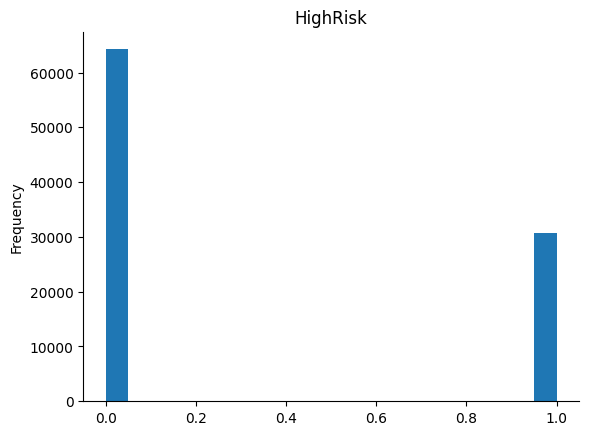

In [ ]:
# @title HighRisk

from matplotlib import pyplot as plt
y['HighRisk'].plot(kind='hist', bins=20, title='HighRisk')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
X.describe()

In [ ]:


X_train = X.drop(columns=['id'])
t = t.drop(columns=['id'])
Y_train = y.drop(columns=['id']) if 'id' in y.columns else y


In [ ]:
print(X.shape)
print(y.shape)
print(t.shape)
print(X_train.shape)
print(Y_train.shape)
X_train.head()




(95000, 26)
(95000, 2)
(5000, 25)
(95000, 25)
(95000, 1)


,IsWeekend,City_0,City_1,City_2,City_3,City_4,City_5,TimeOfDay_0,TimeOfDay_1,TimeOfDay_2,...,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,Weather_0,Weather_1,Weather_2,Weather_3,PhoneBrandPopularity_0,PhoneBrandPopularity_1,PhoneBrandPopularity_2
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0


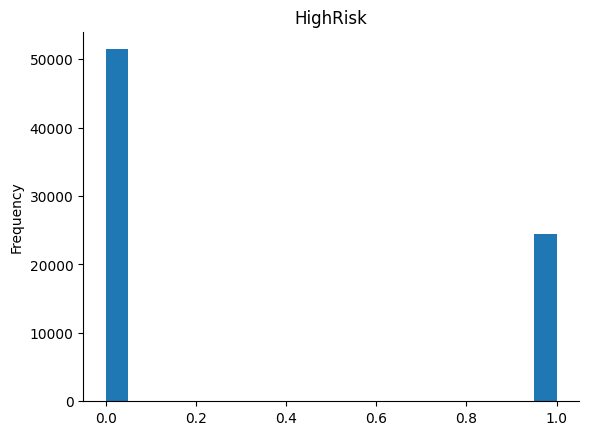

In [ ]:
from matplotlib import pyplot as plt
Y_train['HighRisk'].plot(kind='hist', bins=20, title='HighRisk')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **LogisticRegression**

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [ ]:
# accuracy score on the training data
X_train_prediciton = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediciton, Y_train)

print("Accuracy on training data: ", training_data_accuracy)

Accuracy on training data:  0.6762421052631579


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [ ]:
# accuracy score on the test data
X_test_prediction = model.predict(X_train)
test_data_accuracy = accuracy_score(X_test_prediction, Y_train)


df_test_predictions = pd.DataFrame({'Predicted Class': X_test_prediction})

print("Accuracy on test data: ", test_data_accuracy)
value_counts = df_test_predictions['Predicted Class'].value_counts()
print("Count of each unique value:")
print(value_counts)

Accuracy on test data:  0.6762421052631579
Count of each unique value:
0    95000
Name: Predicted Class, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(




# Decision Tree



In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, Y_train)


DecisionTreeClassifier()

In [ ]:
X_train_prediciton = clf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediciton, Y_train)
print("Accuracy on training data: ", training_data_accuracy)
df_train_predictions = pd.DataFrame({'Predicted Class': X_train_prediciton})
value_counts = df_train_predictions['Predicted Class'].value_counts()
print("Count of each unique value:")
print(value_counts)

Accuracy on training data:  0.6799368421052632
Count of each unique value:
0    91857
1     3143
Name: Predicted Class, dtype: int64


In [ ]:
# accuracy score on the test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


df_test_predictions = pd.DataFrame({'Predicted Class': X_test_prediction})

print("Accuracy on test data: ", test_data_accuracy)
value_counts = df_test_predictions['Predicted Class'].value_counts()
print("Count of each unique value:")
print(value_counts)

Accuracy on test data:  0.6572105263157895
Count of each unique value:
0    18089
1      911
Name: Predicted Class, dtype: int64


# Nb Clasifier

In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
X_train_prediciton = nb_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediciton, Y_train)
print("Accuracy on training data: ", training_data_accuracy)
df_train_predictions = pd.DataFrame({'Predicted Class': X_train_prediciton})

value_counts = df_train_predictions['Predicted Class'].value_counts()
print("Count of each unique value:")
print(value_counts)

Accuracy on training data:  0.6762421052631579
Count of each unique value:
0    95000
Name: Predicted Class, dtype: int64


# RandomForrest


In [ ]:
X_train.columns

Index(['IsWeekend', 'City_0', 'City_1', 'City_2', 'City_3', 'City_4', 'City_5',
       'TimeOfDay_0', 'TimeOfDay_1', 'TimeOfDay_2', 'TimeOfDay_3',
       'DayOfWeek_0', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'Weather_0', 'Weather_1',
       'Weather_2', 'Weather_3', 'PhoneBrandPopularity_0',
       'PhoneBrandPopularity_1', 'PhoneBrandPopularity_2'],
      dtype='object')

In [ ]:
# Number of trees in random forest
n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]
# Minimum number of samples required to split a node
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_split = [1, 2, 5, 10, 15, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

In [ ]:


best_rf_clf = RandomForestClassifier(random_state=0,n_estimators=97)
best_rf_clf.fit(X_train, Y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


KeyboardInterrupt: 

In [ ]:
feature_scores = pd.Series(best_rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

IsWeekend                 0.167511
PhoneBrandPopularity_1    0.041931
PhoneBrandPopularity_0    0.039597
PhoneBrandPopularity_2    0.038770
TimeOfDay_1               0.038033
Weather_2                 0.036844
Weather_1                 0.036492
TimeOfDay_2               0.036002
City_1                    0.035132
Weather_3                 0.035053
City_3                    0.034465
DayOfWeek_1               0.034351
TimeOfDay_3               0.034312
City_5                    0.033957
TimeOfDay_0               0.033942
DayOfWeek_3               0.033229
DayOfWeek_2               0.033148
City_4                    0.033023
City_0                    0.032956
City_2                    0.032569
DayOfWeek_4               0.032270
Weather_0                 0.032257
DayOfWeek_0               0.031623
DayOfWeek_6               0.031610
DayOfWeek_5               0.030923
dtype: float64

In [ ]:
sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

In [ ]:
X_train_prediciton = best_rf_clf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediciton, Y_train)
print("Accuracy on training data: ", training_data_accuracy)
df_train_predictions = pd.DataFrame({'Predicted Class': X_train_prediciton})

value_counts = df_train_predictions['Predicted Class'].value_counts()
print("Count of each unique value:")
print(value_counts)

Accuracy on training data:  0.6799368421052632
Count of each unique value:
0    90789
1     4211
Name: Predicted Class, dtype: int64


In [ ]:
feature_importances = best_rf_clf.feature_importances_
print("Feature Importances:", feature_importances)
important_features = [feature for feature, importance in enumerate(feature_importances) if importance > 0.05]
print("Important Features:", important_features)


Feature Importances: [0.16783102 0.03298071 0.03519759 0.03262997 0.03413886 0.03288598
 0.03410509 0.0336713  0.03790767 0.03607183 0.03413053 0.03185634
 0.03425993 0.03262326 0.03292876 0.0321912  0.0305226  0.03151502
 0.03288594 0.03694461 0.03759554 0.03561773 0.03921492 0.04156487
 0.03872874]
Important Features: [0]


# SVM

In [ ]:
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)
svm_classifier.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_train_prediciton = svm_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediciton, Y_train)
print("Accuracy on training data: ", training_data_accuracy)
df_train_predictions = pd.DataFrame({'Predicted Class': X_train_prediciton})
value_counts = df_train_predictions['Predicted Class'].value_counts()
print("Count of each unique value:")
print(value_counts)

Accuracy on training data:  0.6772236842105264
Count of each unique value:
0    76000
Name: Predicted Class, dtype: int64


# xgboost

In [ ]:

print(X_train.head())
print(Y_train.head())
from math import gamma
import xgboost as xgb
param_grid = {
    'max_depth': [3, 6, 9],       # Maximum depth of the tree
    'n_estimators': [100, 200, 300],  # Number of boosting rounds (trees to build)
    'learning_rate': [0.01, 0.1, 0.3],  # Step size shrinkage used in each boosting step
}

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',  # Specify the learning task and the corresponding objective function
    random_state=42                # Random seed for reproducibility
)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier,
                           param_grid=param_grid,
                           cv=5,            # 5-fold cross-validation
                           scoring='accuracy',  # Use accuracy as the evaluation metric
                           n_jobs=-1)       # Use all available CPU cores





# Retrain the model with the best parameters
best_xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',  # Specify the learning task and the corresponding objective function
    max_depth=3,       # Maximum depth of the tree
    n_estimators=100,  # Number of boosting rounds (trees to build)
    learning_rate=0.01,  # Step size shrinkage used in each boosting step
    random_state=42,  # Random seed for reproducibility
    gamma=0.01,
    min_child_weight=1,  # Minimum sum of instance weight (hessian) needed in a child
    subsample=0.7,  # Subsample ratio of the training instances
    colsample_bytree=0.7,  # Subsample ratio of columns when constructing each tree
  # L2 regularization term on weights
)
# Fit the model with the training data
best_xgb_classifier.fit(X_train, Y_train)



In [ ]:
X_train_prediciton = best_xgb_classifier.predict_proba(X_train)
threshold = 0.33
binary_predictions = np.where(X_train_prediciton[:, 1] > threshold, 1, 0)



array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0])

In [ ]:
training_data_accuracy = accuracy_score(binary_predictions, Y_train)
print("Accuracy on training data: ", training_data_accuracy)
df_train_predictions = pd.DataFrame({'Predicted Class': binary_predictions})
value_counts = df_train_predictions['Predicted Class'].value_counts()
print("Count of each unique value:")
print(value_counts)

Accuracy on training data:  0.6570105263157895
Count of each unique value:
0    88497
1     6503
Name: Predicted Class, dtype: int64


# Deep Learning

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

X_train = X_train.values.astype(np.float32)
t = t.values.astype(np.float32)

X_test = X_test.values.astype(np.float32)
y_train = Y_train.values.astype(np.float32).reshape(-1, 1)
y_test = Y_test.values.astype(np.float32).reshape(-1, 1)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
num_epochs = 10
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=258, verbose=1)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.6362, Test Accuracy: 0.6723


In [ ]:
sub=model.predict(t)
y_pred = (sub >= 0.5).astype(int)
y_pred_swapped = 1 - y_pred

157/157 [==============================] - 0s 1ms/step


# Submission

In [ ]:
t.head()

,City,TimeOfDay,DayOfWeek,IsWeekend,Weather,PhoneBrandPopularity
0,1,1,5,0,0,2
1,2,3,4,0,2,1
2,5,0,3,0,3,0
3,5,0,2,0,2,0
4,4,0,0,1,3,0


In [ ]:
sub2 = best_xgb_classifier.predict_proba(t)
threshold = 0.326801
sub = np.where(sub2[:, 1] > threshold, 1, 0)
sub[0:100]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
s = pd.read_csv('/content/drive/MyDrive/DataSetPhone/submission.csv')

In [ ]:
s['HighRisk'] = sub

In [ ]:
s.to_csv('./mm.csv', index=False)